In [1]:
import numpy as np
import networkx as nx
import pandas as pd
from numpy.random import uniform, randint
from node_SIS import EpidemicGraph, TransitionDiagram, calc_R0
from random import sample
import random
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

2.0


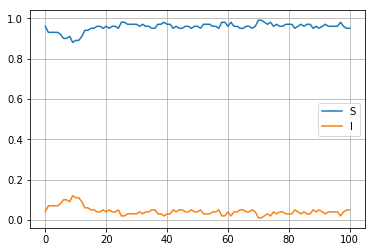

In [14]:
paramet = {
        'betta': 0.4, # infect rate 
        'gamma': 0.2, # rec rate 
    }
N = 100
r = 2

# np.random.seed(787)
# random.seed(4)

a = EpidemicGraph(N,r,paramet,I=4, grid_size=[30,30])  # net='Uniform Grid'
print(calc_R0(a.G, paramet))
G = a.G

a.run(100)
# a.G[0]
asd = a.hist2pandas()
# asd.plot()
asd1 = asd/N
asd1.plot(grid=True)
# pos = nx.get_node_attributes(G, 'position')
# plt.figure(figsize=(8, 8))
# nx.draw_networkx_edges(G, pos, alpha=0.4)
# nx.draw_networkx_nodes(G, pos,
#                        node_size=10,
#                        cmap=plt.cm.Reds_r)
# plt.show()

In [19]:
a.population_size
len(a.G.adj)
a.G.adj


AdjacencyView({0: {58: {}}, 1: {64: {}, 70: {}, 82: {}}, 2: {57: {}}, 3: {}, 4: {}, 5: {13: {}}, 6: {}, 7: {47: {}, 86: {}}, 8: {15: {}, 72: {}, 93: {}}, 9: {36: {}, 50: {}, 87: {}}, 10: {95: {}}, 11: {44: {}}, 12: {60: {}, 88: {}, 89: {}}, 13: {5: {}, 35: {}}, 14: {}, 15: {8: {}, 72: {}, 93: {}}, 16: {66: {}}, 17: {36: {}, 50: {}}, 18: {95: {}}, 19: {}, 20: {}, 21: {24: {}}, 22: {44: {}}, 23: {52: {}}, 24: {21: {}}, 25: {93: {}}, 26: {39: {}, 61: {}}, 27: {41: {}}, 28: {49: {}}, 29: {42: {}, 89: {}}, 30: {73: {}, 79: {}, 91: {}}, 31: {49: {}}, 32: {33: {}, 84: {}}, 33: {32: {}, 84: {}}, 34: {80: {}}, 35: {13: {}}, 36: {9: {}, 17: {}, 50: {}, 87: {}}, 37: {53: {}, 90: {}}, 38: {}, 39: {26: {}}, 40: {74: {}}, 41: {27: {}, 67: {}}, 42: {29: {}}, 43: {92: {}}, 44: {11: {}, 22: {}}, 45: {53: {}}, 46: {68: {}}, 47: {7: {}, 86: {}}, 48: {}, 49: {28: {}, 31: {}}, 50: {9: {}, 17: {}, 36: {}}, 51: {}, 52: {23: {}}, 53: {37: {}, 45: {}, 90: {}}, 54: {}, 55: {76: {}}, 56: {}, 57: {2: {}}, 58: {0:

In [ ]:
def monte(n, r, paramet, nstep=300):
    listt = []
    for i in range(n):
        a = EpidemicGraph(N,r,paramet,I=10, grid_size=[30,30])
        a.run(nstep)
        listt.append(a.hist2pandas())
        print(i+1, end=' ')
    print()
    df = listt[0]
    del listt[0]
    for v in listt:
        df += v
    df /= n
    return df

# asd_monte = monte(5, r, paramet, 100)
asd1 = asd_monte/N
asd1.plot(grid=True)
calc_R0(a.G, paramet)

0.33333333333333337


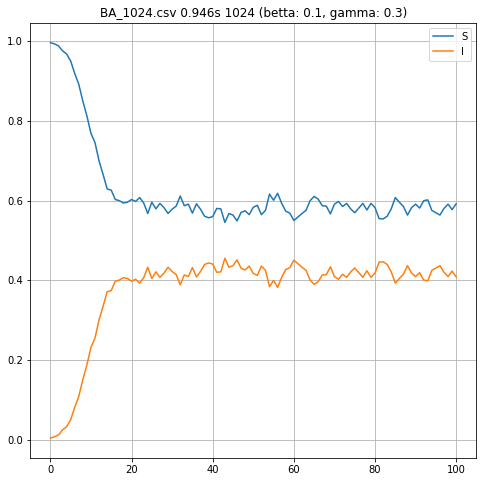

In [11]:
# csv = 'BA_100.csv'  # 100
# csv = 'ER_100.csv'  # 100
# csv = 'WS_100.csv'  # 100

csv = 'BA_1024.csv'
# csv = 'ER_1024.csv'
# csv = 'WS_1024.csv'

# np.random.seed(1)
# random.seed(1)

paramet = { 
        'betta': 0.1, # infect rate 
        'gamma': 0.3, # rec rate 
    }
N = 32*32
r = 2 # dummy

# np.random.seed(787)
# random.seed(4)

a = EpidemicGraph(N,r,paramet,I=4, grid_size=[30,30])  # net='Uniform Grid'
a.load_csv(csv, 4)
print(calc_R0(a.G, paramet))
G = a.G
##########################################
# plt.figure(figsize=(8, 8))
# nx.draw(G, with_labels=False)
# plt.show()
##########################################
timing = a.run(100)
tm = np.array(timing)
tm = tm - tm[0]
# a.G[0]
asd = a.hist2pandas()
# asd.plot()
asd1 = asd/N
### plot
f = asd1.plot(grid=True, figsize=(8, 8))
plt.title('{} {:.3f}s {} (betta: {betta}, gamma: {gamma})'.format(csv, tm[-1]-tm[0], N, **paramet))
# f.get_figure().savefig("foo.pdf", bbox_inches='tight')


asd2 = asd[['I']]
asd2['dI'] = asd2['I'].shift(-1) - asd2['I']
asd2['dt'] = tm
asd2['dI_mean'] = asd2['dI'].rolling(5, center=True).mean().abs()
# asd2

In [2]:
def monte(n, r, paramet, csv, nstep=300):
    listt = []
    timingg = []
    print(N)
    for i in range(n):
        a = EpidemicGraph(N,r,paramet,I=4, grid_size=[30,30])  # net='Uniform Grid'
        a.load_csv(csv, I0 = 4)
        timing = a.run(nstep)
        listt.append(a.hist2pandas())
        timingg.append(np.array(timing))
        print(i+1, end=' ')
    print()
    df = listt[0]
    del listt[0]
    for v in listt:
        df += v
    df /= n
    b = []
    for tm in timingg:
        b.append(tm - tm[0])
    c = np.array(b)
    return df, c.mean(axis=0)

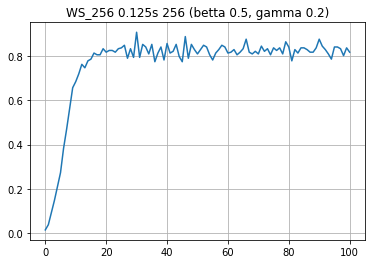

In [30]:
# csv = 'BA_100.csv'
# csv = 'ER_100.csv'
# csv = 'WS_100.csv'
# csv = 'BA_1024.csv'
# csv = 'ER_1024.csv'
# csv = 'WS_1024.csv'

paramet = { 
        'betta': 0.5, # infect rate 
        'gamma': 0.2, # rec rate 
    }
N = 16*16
csv = 'BA_256.csv'
csv = 'ER_256.csv'
csv = 'WS_256.csv'




# np.random.seed(2)
# random.seed(2)
# asd_monte, tm = monte(1, r, paramet, csv, 100)
asd1 = asd_monte['I']/N
f = asd1.plot(grid=True)
plot_title = '{} {:.3f}s {} (betta {betta}, gamma {gamma})'.format(csv.split('.')[0], tm[-1]-tm[0], N, **paramet)
plt.title(plot_title)
f.get_figure().savefig('{}.pdf'.format(plot_title) , bbox_inches='tight')


BA_100.csv {'betta': 0.1, 'gamma': 0.3} 100
100
1 2 3 4 5 6 7 8 9 10 
BA_100.csv {'betta': 0.7, 'gamma': 0.9} 100
100
1 2 3 4 5 6 7 8 9 10 
BA_100.csv {'betta': 0.5, 'gamma': 0.2} 100
100
1 2 3 4 5 6 7 8 9 10 
BA_256.csv {'betta': 0.1, 'gamma': 0.3} 256
256
1 2 3 4 5 6 7 8 9 10 
BA_256.csv {'betta': 0.7, 'gamma': 0.9} 256
256
1 2 3 4 5 6 7 8 9 10 
BA_256.csv {'betta': 0.5, 'gamma': 0.2} 256
256
1 2 3 4 5 6 7 8 9 10 
BA_1024.csv {'betta': 0.1, 'gamma': 0.3} 1024
1024
1 2 3 4 5 6 7 8 9 10 
BA_1024.csv {'betta': 0.7, 'gamma': 0.9} 1024
1024
1 2 3 4 5 6 7 8 9 10 
BA_1024.csv {'betta': 0.5, 'gamma': 0.2} 1024
1024
1 2 3 4 5 6 7 8 9 10 


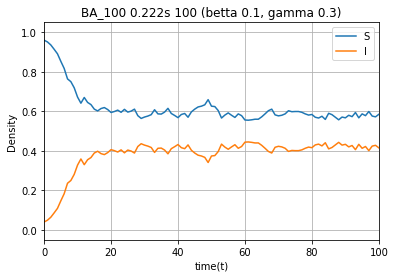

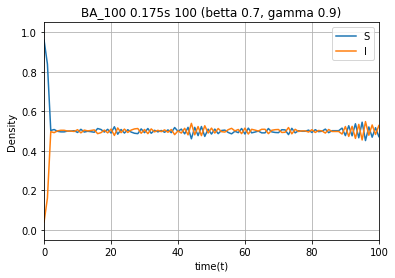

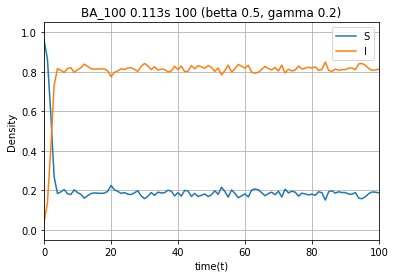

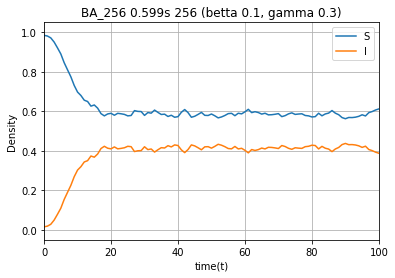

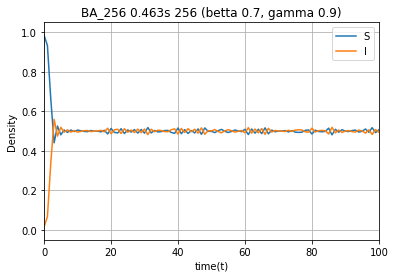

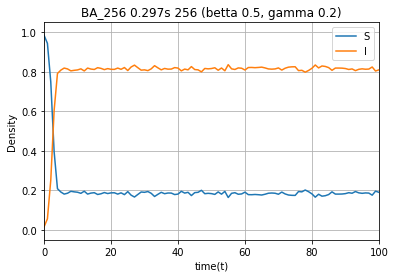

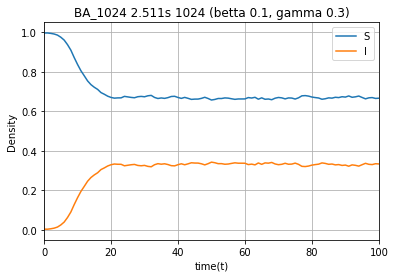

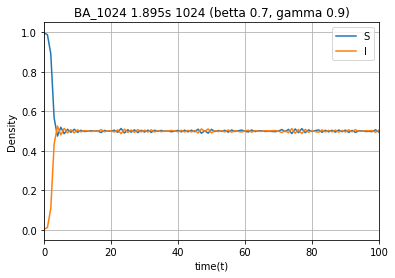

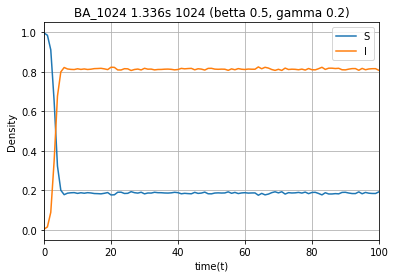

In [4]:
# csv_list = ['BA_100.csv', 'ER_100.csv', 'WS_100.csv', 
#             'BA_256.csv', 'ER_256.csv', 'WS_256.csv',
#             'BA_1024.csv', 'ER_1024.csv', 'WS_1024.csv']
csv_list = ['BA_100.csv', 'BA_256.csv', 'BA_1024.csv']
# csv_list = ['WS_256.csv']
param_list = [{'betta': 0.1, 'gamma': 0.3},
              {'betta': 0.7, 'gamma': 0.9},
              {'betta': 0.5, 'gamma': 0.2}]
r = 2
for csv, paramet in itertools.product(csv_list, param_list):
    N = int(csv.split('_')[-1].split('.')[0])
    print(csv, paramet, N)
    asd_monte, tm = monte(10, r, paramet, csv, 100)
    asd1 = asd_monte/N
    f = asd1.plot(grid=True)
    plot_title = '{} {:.3f}s {} (betta {betta}, gamma {gamma})'.format(csv.split('.')[0], tm[-1]-tm[0], N, **paramet)
    pdf_title = 'fig_2/{} (betta {betta}, gamma {gamma}).pdf'.format(csv.split('.')[0], **paramet)
    plt.title(plot_title)
    plt.xlabel('time(t)')
    plt.ylabel('Density')
    plt.xlim([0,100])
    plt.ylim([-0.05,1.05])
    f.get_figure().savefig(pdf_title, bbox_inches='tight')

(-0.05, 1.05)

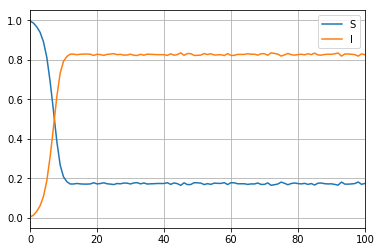

In [12]:

(asd_monte/N).plot(grid=True)
plt.xlim([0,100])
plt.ylim([-0.05,1.05])

In [ ]:
asd = asd_monte[['I']]
asd.plot()
# asd_monte.to_csv('monte_random_15.csv')

NameError: name 'a' is not defined

In [ ]:
nod = a.G.node[0]
# nod['state'] = 'I1_a'
diag.next(a.G, 0)
a.G.node[0]['state'] = a.G.node[0]['next_state']
a.G.node[0]

In [ ]:
uniform(0,[10,1],2)
randint(0, 100,10)
s= sample(range(20), 10)
# print(s[:5], s[5:])
print(s)
del s[1]
s